<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Weather_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEATTLE WHEATHER PREDICTION**

# **1. Introduction**


**Your client for this project is a top forecasting company.**

* They specialize in providing tailored IT solutions for weather forecasting, the energy industry, and the trading market.
* They have extensive experience in developing market-leading forecasting systems and high-speed processing solutions for weather data.
* They are committed to the creation of accurate weather forecasts that clients can trust, going to extra effort to make their weather API easy to consume.


**Current Scenario:**

They have created purpose-built weather drones, allowing them to capture observations missed by traditional methods (such as satellites and weather balloons), and calculating forecasts on the fly to ensure a customer receives a forecast based on the latest observations.



# **2. Problem Statement**

The current process suffers from the following problems:

* The forecasting process is based on making predictions using a large number of variables, and performing complex calculations on them.
* This results in a massive load on the servers and also causes a slight delay in receiving the forecasts.




# **3. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# # import sklearn.linear_model.LogisticRegression as LogisticRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")


# **4. Data Acquisition & Description**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/seattle_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/seattle_test.csv")
dataValidationId=dataValidation.Id

data.head(10)


,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True
2,2,1948-01-03,0.42,45,35,True
3,3,1948-01-04,0.31,45,34,True
4,4,1948-01-05,0.17,45,32,True
5,5,1948-01-06,0.44,48,39,True
6,6,1948-01-07,0.41,50,40,True
7,7,1948-01-08,0.04,48,35,True
8,8,1948-01-09,0.12,50,31,True
9,9,1948-01-10,0.74,43,34,True


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


In [4]:
dataValidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5110 non-null   int64  
 1   DATE    5110 non-null   object 
 2   PRCP    5110 non-null   float64
 3   TMAX    5110 non-null   int64  
 4   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 199.7+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
data.describe()

,Id,PRCP,TMAX,TMIN
count,20440.000000,20438.000000,20440.000000,20440.000000
mean,10219.500000,0.104860,59.301027,44.187965
std,5900.664087,0.235564,12.700363,8.832697
min,0.000000,0.000000,4.000000,0.000000
25%,5109.750000,0.000000,50.000000,38.000000
50%,10219.500000,0.000000,58.000000,44.000000
75%,15329.250000,0.100000,69.000000,51.000000
max,20439.000000,5.020000,100.000000,69.000000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [6]:
print((data=="").sum(), "\n")

Id      0
DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64 



In [7]:
print(data.isna().sum(), "\n")


Id      0
DATE    0
PRCP    2
TMAX    0
TMIN    0
RAIN    2
dtype: int64 



In [8]:
print((data=="Unknown").sum(), "\n")


Id      0
DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64 



In [9]:
data.duplicated().any()

False

**Check distribution of numerical features and Outliers**

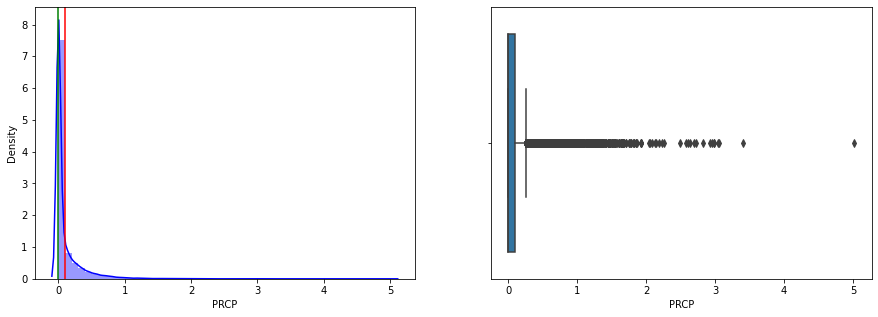

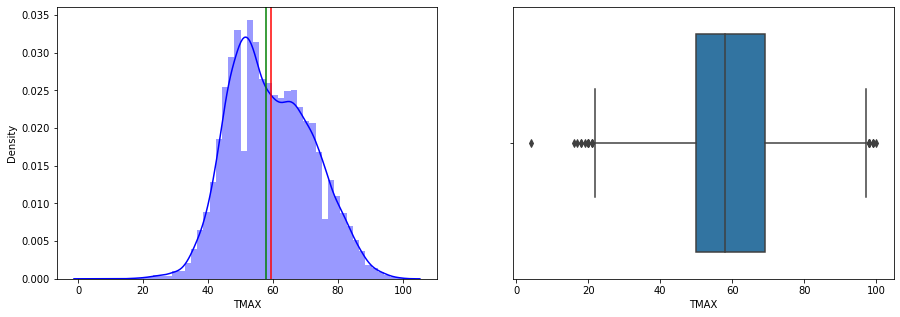

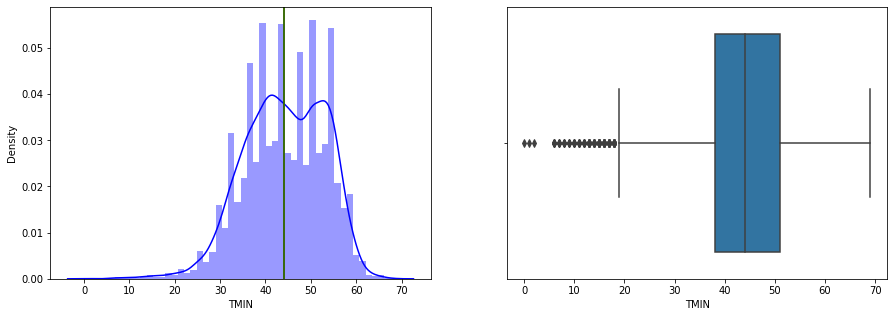

In [10]:
contColumn=data.select_dtypes(exclude=["object"])

for col in contColumn: 
  if (col !="Id"):
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.distplot(data[col], color="b")
    plt.axvline(data[col].mean(), color="r")
    plt.axvline(data[col].median(), color="g")
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
  # quamtile_75=data[col].quantile(q=.75)
  # quamtile_25=data[col].quantile(q=.25)
  # iqr=quamtile_75-quamtile_25
  # lower_limit=quamtile_25-1.5*iqr
  # upper_limit=quamtile_75+1.5*iqr
  # outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  # print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

### **5.2 Data Cleaning**


In [11]:

# # Using simple imputer to impute type 2
# # from sklearn.impute import SimpleImputer
# # imp=SimpleImputer(strategy="most_frequent")
# # data.Type2=imp.fit_transform(data.Type2)
# data.Type2=data.Type2.replace(np.NAN,data.Type2.mode()[0] )
# dataValidation.Type2=dataValidation.Type2.replace(np.NAN,dataValidation.Type2.mode()[0] )
data.drop(data[data.RAIN.isna()==True].index,inplace=True)
data.DATE=pd.to_datetime(data.DATE)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      20438 non-null  int64         
 1   DATE    20438 non-null  datetime64[ns]
 2   PRCP    20438 non-null  float64       
 3   TMAX    20438 non-null  int64         
 4   TMIN    20438 non-null  int64         
 5   RAIN    20438 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.1+ MB


### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

### **Analize Relationship between Temp and Rain**

In [13]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

print(np.sort(data[data.RAIN==True].TMIN.unique()))
print(np.sort(data[data.RAIN==True].TMAX.unique()))
print(np.sort(data[data.RAIN==False].PRCP.unique()))
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()
# data.groupby(["Legendary","Type1"])["Type1"].count().unstack().plot.bar(figsize=[10,5])
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()

# np.sort(data[data.Legendary==0].Attack.unique())

[ 6  7  8  9 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
[ 4 16 18 19 21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 86 88 90]
[0.]


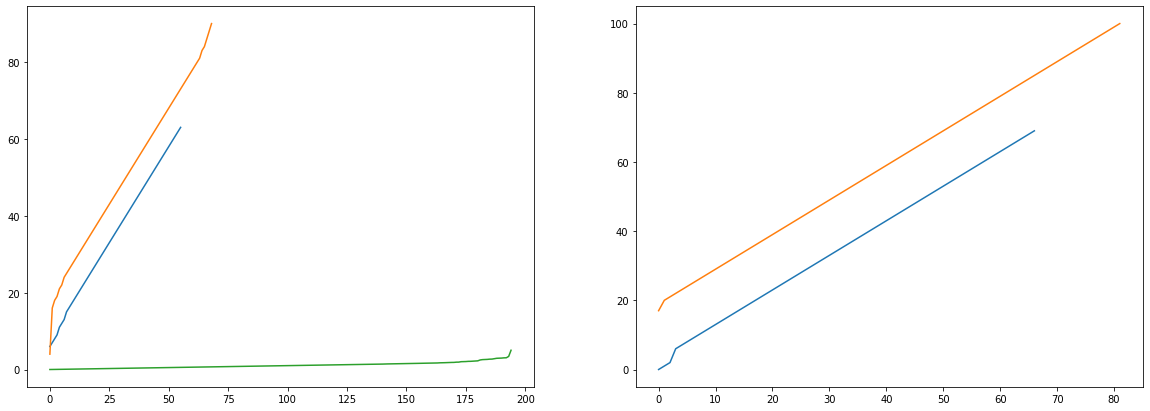

In [14]:
figure=plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
plt.plot(np.sort(data[data.RAIN==True].TMIN.unique()))
plt.plot(np.sort(data[data.RAIN==True].TMAX.unique()))
plt.plot(np.sort(data[data.RAIN==True].PRCP.unique()))

plt.subplot(1,2,2)
plt.plot(np.sort(data[data.RAIN==False].TMIN.unique()))
plt.plot(np.sort(data[data.RAIN==False].TMAX.unique()))
plt.plot(np.sort(data[data.RAIN==False].PRCP.unique()))

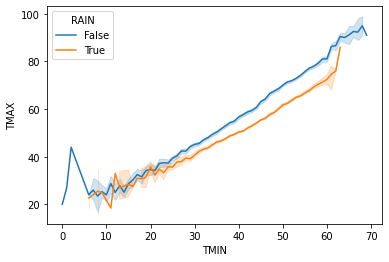

In [15]:
sns.lineplot(data=data, x="TMIN",y="TMAX",hue="RAIN")

# data.groupby(["Type2","Legendary"])["Legendary"].count().unstack().plot.bar(figsize=[10,5])
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()
# data.groupby(["Legendary","Type2"])["Type2"].count().unstack().plot.bar(figsize=[10,5])
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()

### **Analize Relationship between Month and Rain**

In [16]:
print(data[data.RAIN==True].DATE.dt.month_name().unique())
print(data[data.RAIN==False].DATE.dt.month_name().unique())
# data[data.RAIN==True].DATE.dt.year.unique()

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


### **Correlation Matrix**

In [26]:
print(data.RAIN.value_counts())

data.RAIN=data.RAIN.replace(["True","False"],[1,0])

# data.RAIN=data.RAIN.replace("True",1,inplace=True)
# data.RAIN=data.RAIN.replace("False",0,inplace=True)
# print(data.RAIN.value_counts())
# data.Drug=data.Drug.replace(["drugA","drugB","drugC","drugX","DrugY"],[3,4,2,0,1])

False    11771
True      8667
Name: RAIN, dtype: int64


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20438 entries, 0 to 20439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    20438 non-null  float64
 1   TMAX    20438 non-null  int64  
 2   TMIN    20438 non-null  int64  
 3   RAIN    20438 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 1.1 MB


In [ ]:

figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation**



In [30]:
#**Remove Irrelavent Features**
data=data.drop(["Id","DATE"], axis=1)
dataValidation=dataValidation.drop(["Id","DATE"], axis=1)
X=data.drop("RAIN",axis=1)
y=data.RAIN




In [31]:
print(X)
print(y)

       PRCP  TMAX  TMIN
0      0.47    51    42
1      0.59    45    36
2      0.42    45    35
3      0.31    45    34
4      0.17    45    32
...     ...   ...   ...
20435  0.46    48    39
20436  0.07    43    36
20437  0.01    45    38
20438  0.07    51    41
20439  0.00    52    37

[20438 rows x 3 columns]
0         True
1         True
2         True
3         True
4         True
         ...  
20435     True
20436     True
20437     True
20438     True
20439    False
Name: RAIN, Length: 20438, dtype: bool


# **8. Model Development & Evaluation**

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# Define which columns should be scaled
columns_to_scale=["PRCP","TMIN","TMAX"]
# columns_to_encode=["RAIN"]


# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))
# x_trans=pd.DataFrame(column_trans.fit_transform(X))
# x_trans
# x_trans.isna().sum()
# Instantiate Decision Tree Model
mdlList=[RandomForestClassifier(),BaggingClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  # Make Pipeline
  pipe=make_pipeline(column_trans,mdl)
  cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="accuracy",return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                   "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
  # print(cv_score_df.mean())
score_df

# dataValidation_pred=pipe.predict(dataValidation)

# submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
# from google.colab import files
# submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
# files.download('submission.csv')




,ModelName,TrainScore,TestScore
0,RandomForestClassifier(),1.0,1.0
1,BaggingClassifier(),1.0,1.0
2,AdaBoostClassifier(),1.0,1.0
3,GradientBoostingClassifier(),1.0,1.0


In [34]:
pipe=make_pipeline(column_trans,GradientBoostingClassifier())
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['PRCP', 'TMIN', 'TMAX'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

# **9. Dump Model using Pickle**

In [36]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [37]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
# print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'csMPa':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>